# Telco Customer Churn
Objectives: To predict customers who are most likely subject to churn

* [Scrub Data](#scrub)
* EDA - [Heatmap](#heatmap)
* EDA - [Histogram](#histogram)
* EDA - [DataFrame.style](#dataframe)
* EDA - [CountPlot](#countplot)
* [Initial Decision Tree](#tree)
* [Feature Selection](#feat_imp)
* [Final Decison Tree](#final_tree)
* [Logistic Regression](#logistic)
* [Random Forest](#random_forest)
* [Gradient Boosting](#gradient)


In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5666,8318-LCNBW,Male,0,Yes,No,35,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),53.15,1930.9,No
3657,8450-LUGUK,Female,0,Yes,Yes,37,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.10,861.85,No
2279,5334-AFQJB,Male,1,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.9,No
5241,7753-USQYQ,Male,0,No,No,55,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Electronic check,64.20,3627.3,No
2908,7780-OTDSO,Male,0,Yes,No,18,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.40,1742.95,Yes
1678,1060-ENTOF,Female,1,Yes,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),105.40,7035.6,No
1606,6374-NTQLP,Male,1,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.10,7447.7,No
5832,6017-PPLPX,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.45,1470.95,Yes
72,1891-QRQSA,Male,1,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.60,7099,No
2912,0674-DGMAQ,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,93.50,2970.8,No


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a id='scrub'></a>
# Scrub Data

In [199]:
categorical_columns = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1).columns.tolist()

# print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of variable: %s'%col)
    print (df[col].value_counts())


Frequency of variable: gender
Male      3555
Female    3488
Name: gender, dtype: int64

Frequency of variable: SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Frequency of variable: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Frequency of variable: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

Frequency of variable: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

Frequency of variable: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Frequency of variable: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Frequency of variable: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Frequency of variable: OnlineBackup
No                     3088
Yes                    2429
No internet servic

In [200]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [201]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_cols:
    df[column] = df[column].map({'No': 0, 'Yes': 1})


In [202]:
binning = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in binning:
    df[column] = df[column].map({'No': 0, 'Yes': 1, 'No internet service': 0})

In [203]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [205]:
cols_enc = ['InternetService', 'Contract', 'PaymentMethod']
prefix_dict = {'InternetService':'InternetService', 
               'Contract':'Contract', 
               'PaymentMethod':'PaymentMethod'}

df_enc = pd.get_dummies(df, prefix=prefix_dict, columns=cols_enc)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [206]:
df_enc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Explore Data

<a id='heatmap'></a>
### Heatmap

In [207]:
df2 = df_enc.drop('customerID', axis=1)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


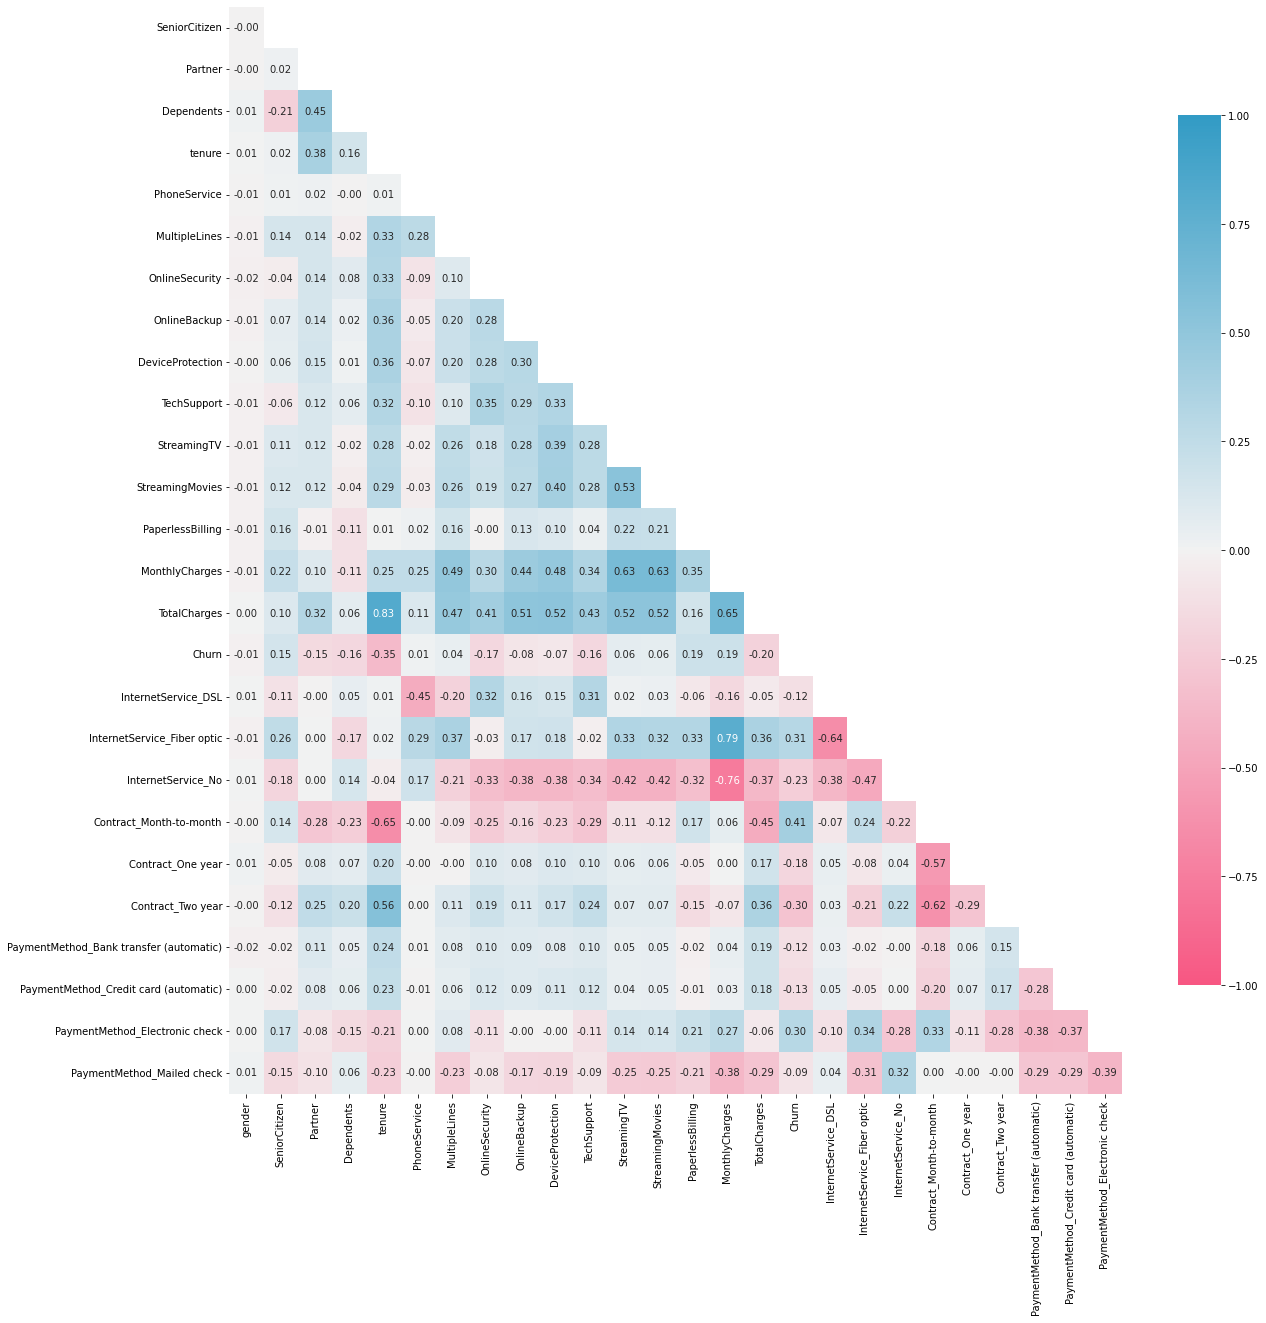

In [208]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 20))

corr = df2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.show()

# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

| ⬆️ Churn | ➕ Correlation |
|-------|-------|
| Contract_Month-to-month | 0.41 |
| InternetService_Fiber optic | 0.31 |
| PaymentMethod_Electronic check | 0.30 |
| PaperlessBilling | 0.19 |
| MonthlyCharges | 0.19 | 


| ⬆️ Churn | ➖ Correlation |
|-----|-----|
| tenure | -0.35 |
| Contract_Two year | -0.30 |
| InternetService_No | -0.23 |
| TotalCharges | -0.20 |


<a id='histogram'></a>
### Histogram

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

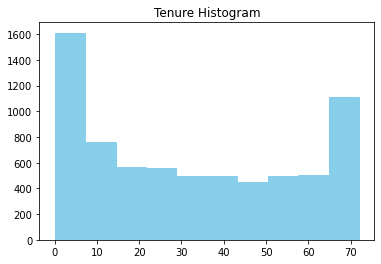

In [209]:
x = df2['tenure']

plt.title('Tenure Histogram')
plt.hist(x, color="skyblue", ec="skyblue")

* Histogram of tenure appears as a U-shaped graph
* Engagement of telco customers is not static and changes over time

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

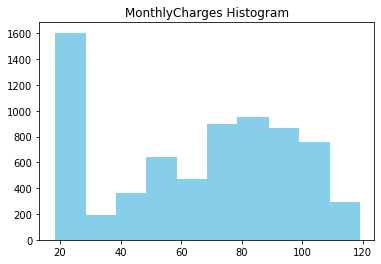

In [210]:
x = df2['MonthlyCharges']

plt.title('MonthlyCharges Histogram')
plt.hist(x, color="skyblue", ec="skyblue")

* A big chunk of customers with monthly charges below USD 30 

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

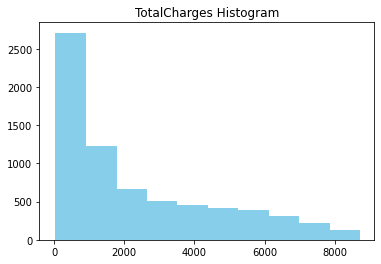

In [211]:
x = df2['TotalCharges']

plt.title('TotalCharges Histogram')
plt.hist(x, color="skyblue", ec="skyblue")

* Total charges with right skewed distribution
* Most customers with total charges below USD 4k

<a id='dataframe'></a>
### DataFrame.style

In [212]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5342,0,0,0,0,37,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3021,1,0,0,0,5,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
558,1,0,0,0,11,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
864,1,0,0,0,22,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
6804,1,0,1,1,5,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1


In [213]:
churn_yes = len(df2[df2['Churn'] == 1])
churn_no = len(df2[df2['Churn'] == 0])
churn_rate = churn_yes / (churn_yes + churn_no) * 100

pd.DataFrame({'Total Bad': churn_yes, 'Total Good': churn_no, 'Portfolio Churn Rate %': [round(churn_rate, 2)]})

,Total Bad,Total Good,Portfolio Churn Rate %
0,1869,5174,26.54


In [214]:
new_df = {}
new_df['male'] = df2.loc[df2['gender'] == 1, 'Churn'].value_counts()
new_df['female'] = df2.loc[df2['gender'] == 0, 'Churn'].value_counts()
new_df['senior'] = df2.loc[df2['SeniorCitizen'] == 1, 'Churn'].value_counts()
new_df['non-senior'] = df2.loc[df2['SeniorCitizen'] == 0, 'Churn'].value_counts()
new_df['tenure_lt_1yr'] = df2.loc[df2['tenure'] < 12, 'Churn'].value_counts()
new_df['tenure_lt_2yr'] = df2.loc[df2['tenure'] < 24, 'Churn'].value_counts()
new_df['tenure_lt_3yr'] = df2.loc[df2['tenure'] < 36, 'Churn'].value_counts()
new_df['tenure_gt_5yr'] = df2.loc[df2['tenure'] > 60, 'Churn'].value_counts()
new_df['1mth_contract'] = df2.loc[df2['Contract_Month-to-month'] == 1, 'Churn'].value_counts()
new_df['1yr_contract'] = df2.loc[df2['Contract_One year'] == 1, 'Churn'].value_counts()
new_df['2yr_contract'] = df2.loc[df2['Contract_Two year'] == 1, 'Churn'].value_counts()


In [215]:
new_df = pd.DataFrame(new_df).T

In [216]:
new_df['Churn Rate %'] = new_df[1] / (new_df[1] + new_df[0])

sorted_new_df = new_df.sort_values(by=['Churn Rate %'], ascending=False)
sorted_new_df.head(13).style.format({0: "{:.0f}", 1: "{:.0f}", 'Churn Rate %': "{:.2%}"})\
                            .bar(subset=['Churn Rate %'], color='#ee1f5f')

,0,1,Churn Rate %
tenure_lt_1yr,1070,999,48.28%
1mth_contract,2220,1655,42.71%
tenure_lt_2yr,1808,1308,41.98%
senior,666,476,41.68%
tenure_lt_3yr,2491,1501,37.60%
female,2549,939,26.92%
male,2625,930,26.16%
non-senior,4508,1393,23.61%
1yr_contract,1307,166,11.27%
tenure_gt_5yr,1314,93,6.61%


Comparison of Churn Rates: 
* Long-tenure customers are less likely to churn - Churn rate of tenure less than 1 year is 48.28%
* Customers with more flexible month-to-month contract are more likely to churn - Churn rate of monthly contract is 42.71%
* A high portion of senior citizens will churn than non-senior citizens
* Female is slightly likely to churn compared with male

<a id='countplot'></a>
### CountPlot

<AxesSubplot:xlabel='Contract_Two year', ylabel='count'>

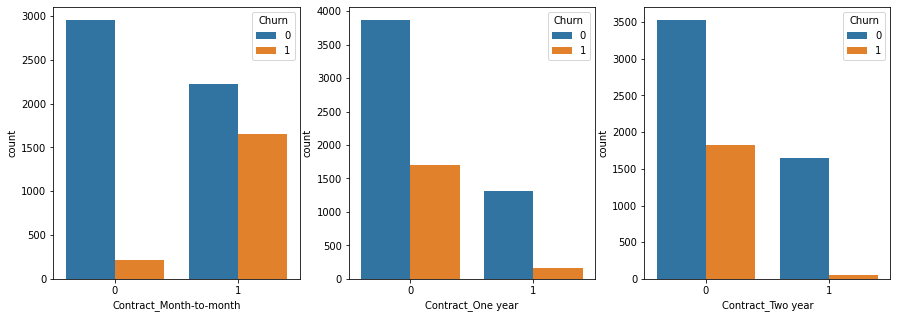

In [217]:
main, subplots = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=df2, x="Contract_Month-to-month", hue="Churn", ax=subplots[0])
sns.countplot(data=df2, x="Contract_One year", hue="Churn", ax=subplots[1])
sns.countplot(data=df2, x="Contract_Two year", hue="Churn", ax=subplots[2])

<AxesSubplot:xlabel='PaymentMethod_Mailed check', ylabel='count'>

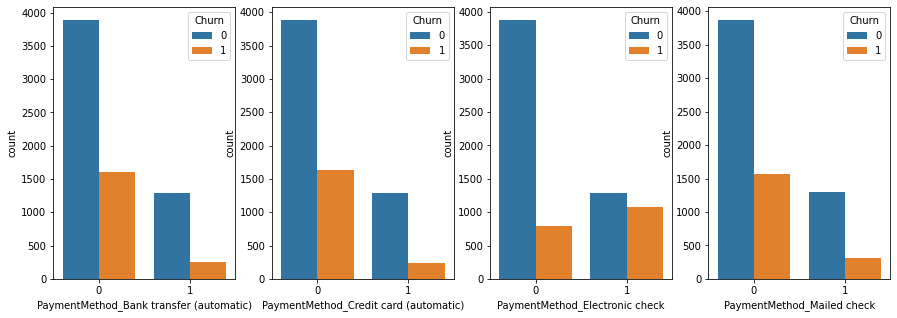

In [218]:
main, subplots = plt.subplots(1, 4, figsize=(15,5))
sns.countplot(data=df2, x="PaymentMethod_Bank transfer (automatic)", hue="Churn", ax=subplots[0])
sns.countplot(data=df2, x="PaymentMethod_Credit card (automatic)", hue="Churn", ax=subplots[1])
sns.countplot(data=df2, x="PaymentMethod_Electronic check", hue="Churn", ax=subplots[2])
sns.countplot(data=df2, x="PaymentMethod_Mailed check", hue="Churn", ax=subplots[3])

* PaymentMethod_Electronic check has the highest churn rate compared with other payment methods

<AxesSubplot:xlabel='InternetService_No', ylabel='count'>

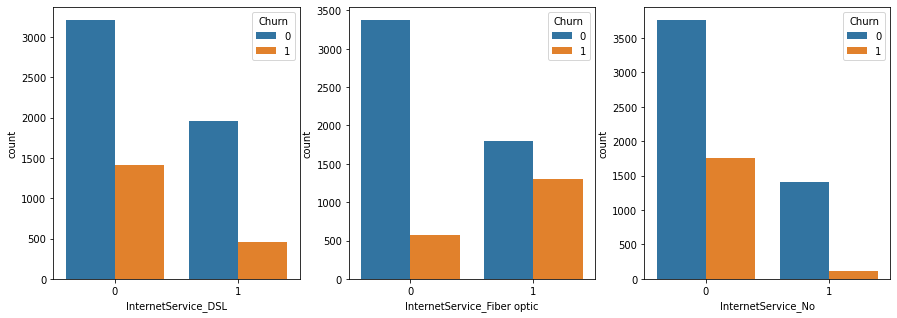

In [219]:
main, subplots = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(data=df2, x="InternetService_DSL", hue="Churn", ax=subplots[0])
sns.countplot(data=df2, x="InternetService_Fiber optic", hue="Churn", ax=subplots[1])
sns.countplot(data=df2, x="InternetService_No", hue="Churn", ax=subplots[2])

* InternetService_Fiber optic has the highest churn rate, followed by InternetService_DSL and InternetService_No
* Implying fiber internet customers are not statisfied with the service

<a id='tree'></a>
# Initial Decision Tree




Target: Churn

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [221]:
df3 = df2.dropna()

In [222]:
train_data = df3.drop(['Churn'], axis=1)
train_labels = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [223]:
string = "Accuracy = {AR:.2%}"

y_pred = model.predict(X_test)
AR = metrics.accuracy_score(y_test, y_pred)
print(string.format(AR = AR))

Accuracy = 79.76%


[Text(418.5, 713.475, 'Contract_Month-to-month <= 0.5\ngini = 0.391\nsamples = 4922\nvalue = [3608, 1314]\nclass = No'),
 Text(209.25, 509.625, 'MonthlyCharges <= 93.675\ngini = 0.128\nsamples = 2217\nvalue = [2065, 152]\nclass = No'),
 Text(104.625, 305.775, 'Contract_One year <= 0.5\ngini = 0.077\nsamples = 1652\nvalue = [1586, 66]\nclass = No'),
 Text(52.3125, 101.92499999999995, 'gini = 0.022\nsamples = 898\nvalue = [888, 10]\nclass = No'),
 Text(156.9375, 101.92499999999995, 'gini = 0.138\nsamples = 754\nvalue = [698, 56]\nclass = No'),
 Text(313.875, 305.775, 'Contract_One year <= 0.5\ngini = 0.258\nsamples = 565\nvalue = [479, 86]\nclass = No'),
 Text(261.5625, 101.92499999999995, 'gini = 0.144\nsamples = 281\nvalue = [259, 22]\nclass = No'),
 Text(366.1875, 101.92499999999995, 'gini = 0.349\nsamples = 284\nvalue = [220, 64]\nclass = No'),
 Text(627.75, 509.625, 'InternetService_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2705\nvalue = [1543, 1162]\nclass = No'),
 Text(523.125, 3

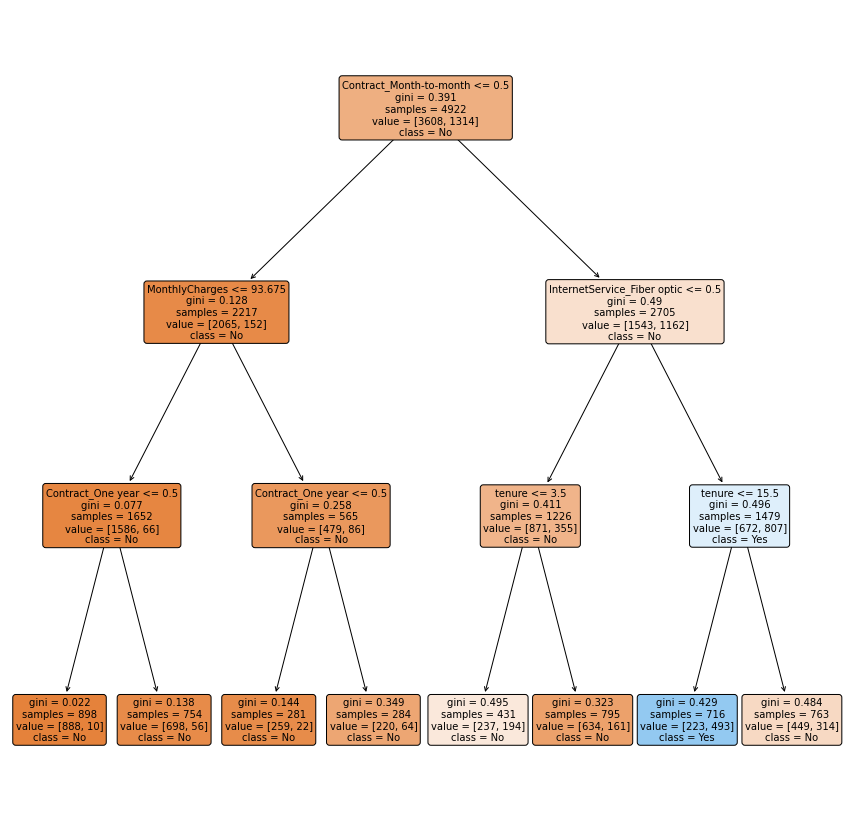

In [224]:
columns = list(X_train.columns)
plt.figure(figsize=(15,15))
tree.plot_tree(model, 
               fontsize=10, 
               feature_names=columns, 
               class_names=['No', 'Yes'], 
               filled=True, 
               rounded=True)


* Monthly contract with tenure <= 15.5 is most likely to churn (493 out of 716)

<a id='feat_imp'></a>
# Feature Selection

In [225]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [226]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

<AxesSubplot:>

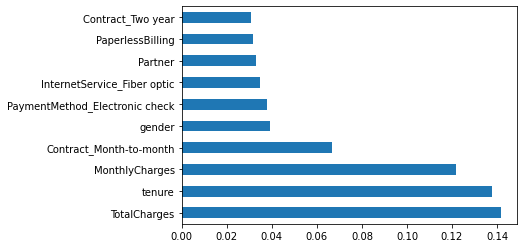

In [227]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False,inplace=True)
feat_importances.nlargest(10).plot(kind="barh")


* Top 3 feature importances - TotalCharges, tenure, MonthlyCharges

<a id='final_tree'></a>
# Final Decision Tree

In [228]:
df4 = df2.rename(columns={"InternetService_Fiber optic": "FiberOptic", 
                          "PaymentMethod_Electronic check": "ElectronicCheck"})

In [229]:
# top features
# TotalCharges highly correlated with Tenure [0.83] - drop TotalCharges
# FiberOptic highly correlated with MonthlyCharges [0.79]

selected_feat= ['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 
                'gender', 'ElectronicCheck', 'PaperlessBilling']

train_data_2 = {}
train_data_2 = df4[selected_feat]
train_label_2 = df4['Churn']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_data_2, train_label_2, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train_2, y_train_2)

DecisionTreeClassifier(max_depth=3)

In [230]:
string = "Accuracy = {AR:.2%}"

y_pred_2 = model.predict(X_test_2)
AR = metrics.accuracy_score(y_test_2, y_pred_2)
print(string.format(AR = AR))

Accuracy = 80.08%


[Text(418.5, 713.475, 'Contract_Month-to-month <= 0.5\ngini = 0.396\nsamples = 4930\nvalue = [3589, 1341]\nclass = No'),
 Text(209.25, 509.625, 'MonthlyCharges <= 93.675\ngini = 0.138\nsamples = 2202\nvalue = [2038, 164]\nclass = No'),
 Text(104.625, 305.775, 'MonthlyCharges <= 41.375\ngini = 0.086\nsamples = 1664\nvalue = [1589, 75]\nclass = No'),
 Text(52.3125, 101.92499999999995, 'gini = 0.034\nsamples = 758\nvalue = [745, 13]\nclass = No'),
 Text(156.9375, 101.92499999999995, 'gini = 0.127\nsamples = 906\nvalue = [844, 62]\nclass = No'),
 Text(313.875, 305.775, 'tenure <= 70.5\ngini = 0.276\nsamples = 538\nvalue = [449, 89]\nclass = No'),
 Text(261.5625, 101.92499999999995, 'gini = 0.335\nsamples = 395\nvalue = [311, 84]\nclass = No'),
 Text(366.1875, 101.92499999999995, 'gini = 0.067\nsamples = 143\nvalue = [138, 5]\nclass = No'),
 Text(627.75, 509.625, 'MonthlyCharges <= 68.425\ngini = 0.491\nsamples = 2728\nvalue = [1551, 1177]\nclass = No'),
 Text(523.125, 305.775, 'tenure <= 5

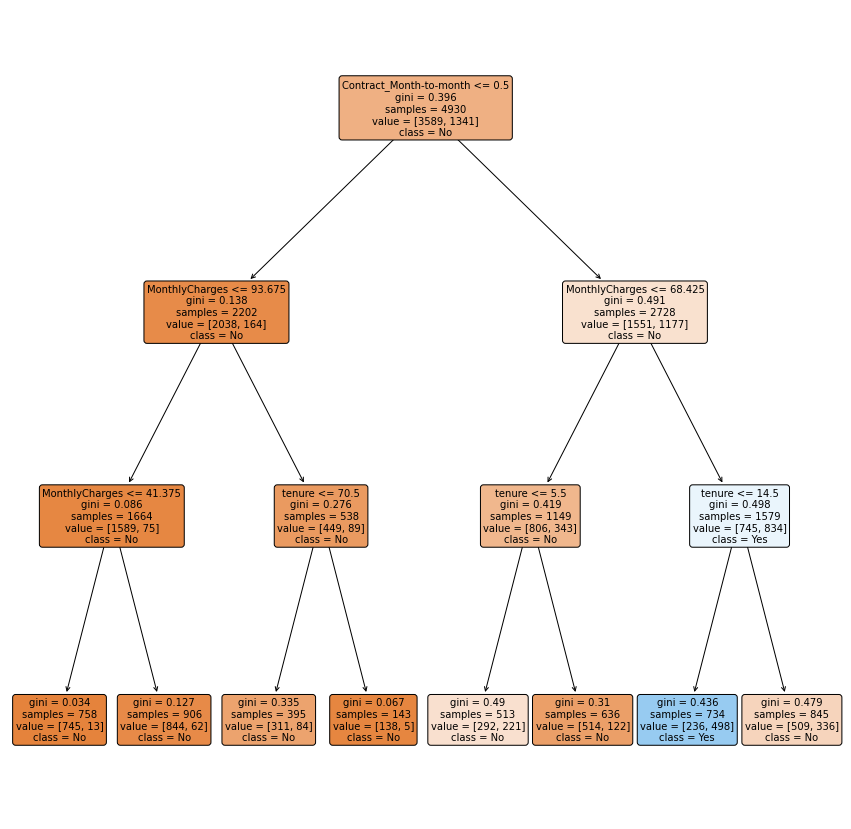

In [231]:
columns = list(X_train_2.columns)
plt.figure(figsize=(15,15))
tree.plot_tree(model, 
               fontsize=10, 
               feature_names=columns, 
               class_names=['No', 'Yes'], 
               filled=True, 
               rounded=True)

* Monthly contract with short tenure is most likely to churn 
  - Tenure <= 14.5 having 67.85% churn rate
  - Tenure > 14.5 having 39.76% churn rate

* Monthly contract with high monthly charges ~$94 and tenure <= 70.5 has higher churn rate than tenure > 70.5

* A non-monthly contract with low monthly charges ~$41 is less likely to churn 
  - 1.72% churn rate

`Determinants of Telco Churn - Flexible Monthly Contract, Short Tenure, High Monthly Charges`


In [232]:
df_predict = {}
df_predict = train_data_2.iloc[0:0].copy()

In [233]:
df_predict = df_predict.append({
    "tenure": 12, 
    "MonthlyCharges": 90, 
    "Contract_Month-to-month": 1, 
    "gender": 0, 
    "ElectronicCheck": 1, 
    "PaperlessBilling": 0
}, ignore_index=True)

In [234]:
df_predict

,tenure,MonthlyCharges,Contract_Month-to-month,gender,ElectronicCheck,PaperlessBilling
0,12,90.0,1,0,1,0


In [235]:
model.predict(df_predict)

array([1], dtype=int64)

<a id='logistic'></a>
# Logistics Regression

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [237]:
reg = LogisticRegression()
reg.fit(X_train_2, y_train_2)
y_pred = reg.predict(X_test_2)

In [238]:
string = "Accuracy of logistic regression = {AR:.2%}"
reg.score(X_test_2, y_test_2)
print(string.format(AR = AR))

Accuracy of logistic regression = 80.08%


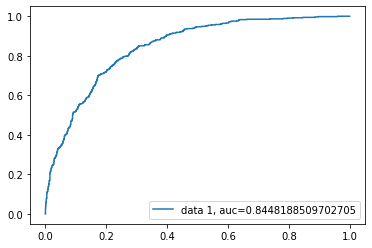

In [239]:
y_pred_proba = reg.predict_proba(X_test_2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_2, y_pred_proba)
auc = metrics.roc_auc_score(y_test_2, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [240]:
reg_outputs = reg.predict(X_train_2)
reg_outputs

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [241]:
reg_outputs == y_train_2

5925     True
4395    False
1579     True
1040    False
1074     True
        ...  
905      True
5192     True
3980     True
235     False
5157     True
Name: Churn, Length: 4930, dtype: bool

In [242]:
np.sum((reg_outputs == y_train_2))

3869

In [243]:
reg_outputs.shape[0]

4930

In [244]:
string = "Area Under Curve = {AR:.2%}"
log_AR = np.sum((reg_outputs == y_train_2)) / reg_outputs.shape[0]
print(string.format(AR = log_AR))

Area Under Curve = 78.48%


In [245]:
summary_table = pd.DataFrame(columns=['Features'], data=selected_feat)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Features,Coefficient
0,tenure,-0.036192
1,MonthlyCharges,0.024049
2,Contract_Month-to-month,1.090983
3,gender,0.011962
4,ElectronicCheck,0.531726
5,PaperlessBilling,0.411038


In [246]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficient
0,Intercept,-2.897860
1,tenure,-0.036192
2,MonthlyCharges,0.024049
3,Contract_Month-to-month,1.090983
4,gender,0.011962
5,ElectronicCheck,0.531726
6,PaperlessBilling,0.411038


In [247]:
summary_table['Odds_Ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_Ratio', ascending=False)

,Features,Coefficient,Odds_Ratio
3,Contract_Month-to-month,1.090983,2.977201
5,ElectronicCheck,0.531726,1.701867
6,PaperlessBilling,0.411038,1.508382
2,MonthlyCharges,0.024049,1.024340
4,gender,0.011962,1.012034
1,tenure,-0.036192,0.964455
0,Intercept,-2.897860,0.055141


<a id='random_forest'></a>
# Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.inspection import plot_partial_dependence
import shap

In [249]:
def AR_score(estimator, X, y):
    AUC = roc_auc_score(y, estimator.predict_proba(X)[:,1])
    return (AUC-0.5)/0.5

In [ ]:
RFClassifier = RandomForestClassifier(n_estimators=100, random_state=88)
hyperparameters = {
    'max_samples': [0.1, 0.5, None],
    'max_features': [0.1, 'sqrt', 0.5, 0.9],
    'max_depth': [1, 3, 5, 10]
}
tuning_RF = GridSearchCV(
    estimator = RFClassifier,
    param_grid = hyperparameters,
    scoring = AR_score,
    cv = 5,
    verbose = 2)
tuning_RF.fit(X_train, y_train)
result_RF = pd.DataFrame(tuning_RF.cv_results_)
result_RF = result_RF.loc[:,['param_max_depth','param_max_features','param_max_samples','mean_test_score','std_test_score','rank_test_score']]

In [251]:
result_RF.head()

,param_max_depth,param_max_features,param_max_samples,mean_test_score,std_test_score,rank_test_score
0,1,0.1,0.1,0.651221,0.032721,42
1,1,0.1,0.5,0.651897,0.032019,40
2,1,0.1,None,0.651840,0.032638,41
3,1,sqrt,0.1,0.652659,0.032655,39
4,1,sqrt,0.5,0.654519,0.027805,37


In [252]:
RFClassifier = tuning_RF.best_estimator_
RFClassifier = RandomForestClassifier(
        n_estimators=100, 
        random_state=88,
        max_samples=None,
        max_features=0.5,
        max_depth=5)
RFClassifier.fit(X_train, y_train)
AR_score(RFClassifier, X_train, y_train), AR_score(RFClassifier, X_test, y_test)

(0.730153185716166, 0.6950169462066569)

In [253]:
feat_imp=pd.Series(RFClassifier.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False,inplace=True)
feat_imp

Contract_Month-to-month                    0.307672
tenure                                     0.207215
InternetService_Fiber optic                0.128490
TotalCharges                               0.081283
MonthlyCharges                             0.076864
PaymentMethod_Electronic check             0.051494
Contract_Two year                          0.043953
InternetService_No                         0.019242
Contract_One year                          0.014169
InternetService_DSL                        0.012452
StreamingMovies                            0.008201
StreamingTV                                0.006713
OnlineSecurity                             0.006688
PhoneService                               0.006466
PaperlessBilling                           0.005899
MultipleLines                              0.005445
SeniorCitizen                              0.003703
TechSupport                                0.003260
OnlineBackup                               0.002126
PaymentMetho

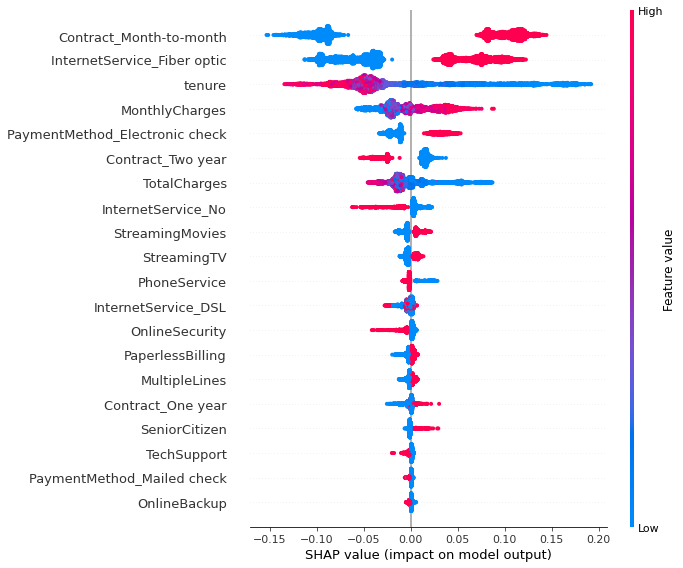

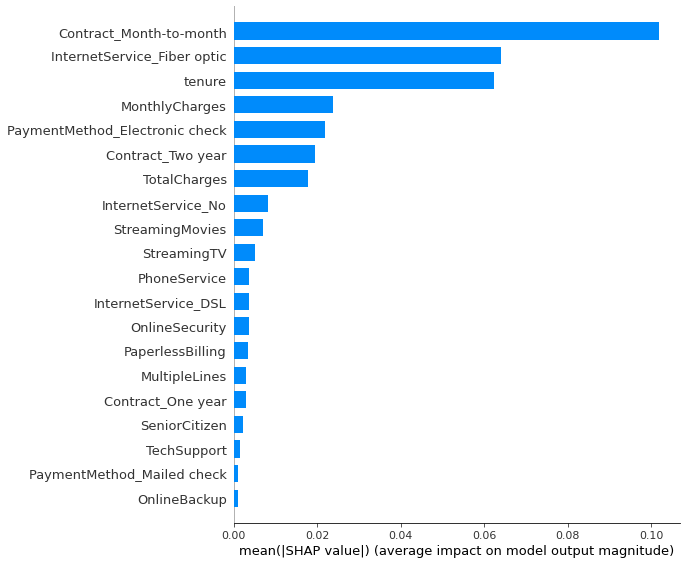

In [254]:
RF_explainer = shap.TreeExplainer(RFClassifier)
RF_shap_values = RF_explainer.shap_values(X_train)
shap.summary_plot(RF_shap_values[1],X_train)
shap.summary_plot(RF_shap_values[1],X_train,plot_type='bar')

In [255]:
X_train.mean()

gender                                        0.505486
SeniorCitizen                                 0.165989
Partner                                       0.481715
Dependents                                    0.300081
tenure                                       32.342544
PhoneService                                  0.904510
MultipleLines                                 0.428078
OnlineSecurity                                0.287282
OnlineBackup                                  0.351077
DeviceProtection                              0.349248
TechSupport                                   0.296831
StreamingTV                                   0.388460
StreamingMovies                               0.384193
PaperlessBilling                              0.593661
MonthlyCharges                               65.070388
TotalCharges                               2297.232629
InternetService_DSL                           0.345388
InternetService_Fiber optic                   0.442097
InternetSe

In [256]:
bad_index = y_train[y_train==1].index
bad_index

Int64Index([1043, 1077, 6908, 3887, 3006, 2406, 5360, 4384, 3595, 3841,
            ...
             252, 2521, 5383, 2802, 4232, 5064, 2900, 3987,  235, 5165],
           dtype='int64', length=1314)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


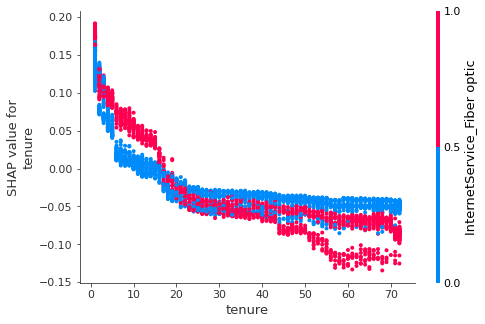

In [257]:
shap.dependence_plot("tenure", RF_shap_values[1], X_train)

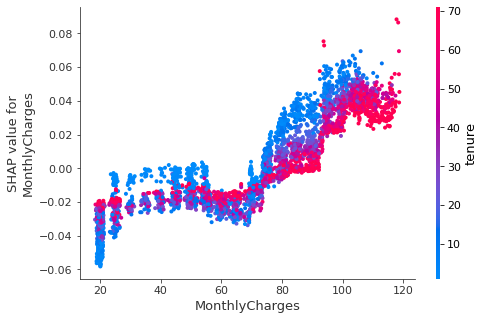

In [258]:
shap.dependence_plot("MonthlyCharges", RF_shap_values[1], X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


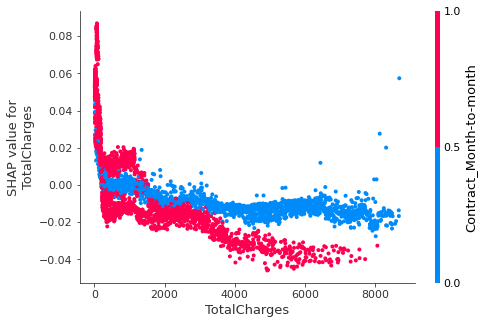

In [259]:
shap.dependence_plot("TotalCharges", RF_shap_values[1], X_train)

<a id='gradient'></a>
# Gradient Boosting

In [ ]:
GBClassifier = GradientBoostingClassifier(n_estimators=100, n_iter_no_change=5, random_state=88)
hyperparameters = {
        'learning_rate': [0.1, 0.05, 0.01],
        'subsample': [0.1, 0.5, 0.9],
        'max_features': [0.1, 'sqrt', 0.5, 0.9],
        'max_depth': [1, 3, 5, 10]
        }
tuning_GB = GridSearchCV(
        estimator=GBClassifier,
        param_grid=hyperparameters,
        scoring=AR_score,
        cv=5,
        verbose=2)
tuning_GB.fit(X_train, y_train)
result_GB = pd.DataFrame(tuning_GB.cv_results_)
result_GB = result_GB.loc[:,['param_learning_rate','param_max_depth','param_max_features','param_subsample','mean_test_score','std_test_score','rank_test_score']]

In [261]:
result_GB.head()

,param_learning_rate,param_max_depth,param_max_features,param_subsample,mean_test_score,std_test_score,rank_test_score
0,0.1,1,0.1,0.1,0.682169,0.027875,60
1,0.1,1,0.1,0.5,0.680526,0.027314,69
2,0.1,1,0.1,0.9,0.680294,0.025616,72
3,0.1,1,sqrt,0.1,0.680924,0.026930,67
4,0.1,1,sqrt,0.5,0.684802,0.027188,48


In [262]:
GBClassifier = tuning_GB.best_estimator_
GBClassifier = GradientBoostingClassifier(
        n_estimators=100, 
        n_iter_no_change=5, 
        random_state=88,
        learning_rate=0.01,
        subsample=0.9,
        max_features=0.5,
        max_depth=5
        )
GBClassifier.fit(X_train, y_train)
AR_score(GBClassifier, X_train, y_train), AR_score(GBClassifier, X_test, y_test)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


(0.7504874589530455, 0.693514092871006)

In [263]:
feat_imp=pd.Series(GBClassifier.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False,inplace=True)
feat_imp

Contract_Month-to-month                    0.328280
tenure                                     0.188985
InternetService_Fiber optic                0.118023
MonthlyCharges                             0.089637
TotalCharges                               0.079144
PaymentMethod_Electronic check             0.058069
Contract_Two year                          0.017397
InternetService_No                         0.015256
OnlineSecurity                             0.012524
InternetService_DSL                        0.012103
MultipleLines                              0.012072
StreamingMovies                            0.011937
PaperlessBilling                           0.010767
PhoneService                               0.008913
StreamingTV                                0.007440
Contract_One year                          0.006816
TechSupport                                0.005715
SeniorCitizen                              0.004994
PaymentMethod_Mailed check                 0.002524
OnlineBackup

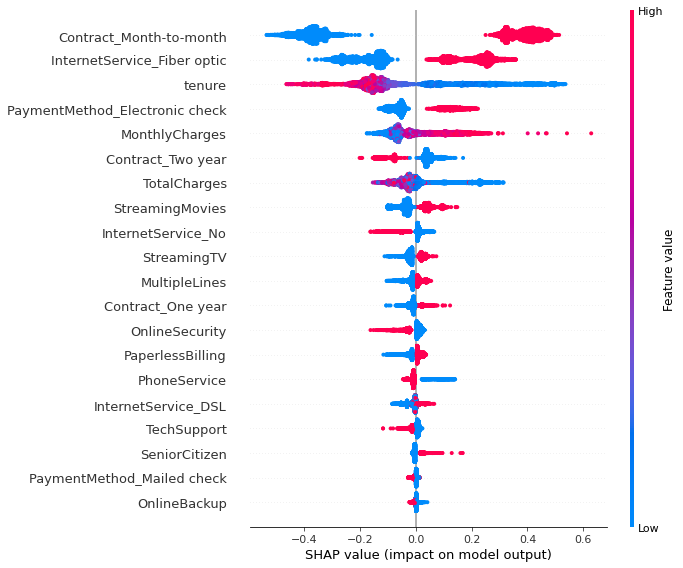

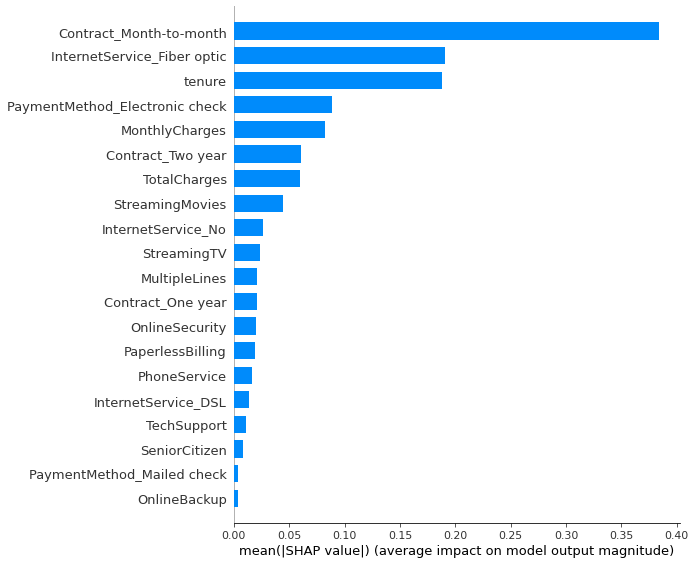

In [264]:
GB_explainer = shap.TreeExplainer(GBClassifier)
GB_shap_values = GB_explainer.shap_values(X_train)
shap.summary_plot(GB_shap_values,X_train)
shap.summary_plot(GB_shap_values,X_train,plot_type='bar')

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


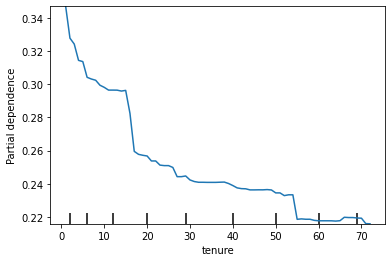

In [265]:
plot_partial_dependence(GBClassifier, X_train, ['tenure'], response_method='predict_proba', method='brute')

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


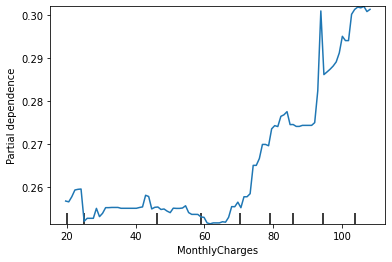

In [266]:
plot_partial_dependence(GBClassifier, X_train, ['MonthlyCharges'], response_method='predict_proba', method='brute')

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


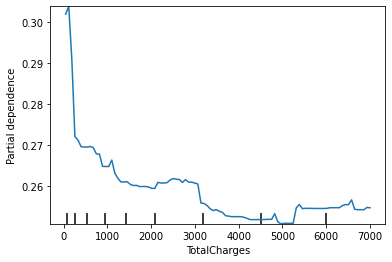

In [267]:
plot_partial_dependence(GBClassifier, X_train, ['TotalCharges'], response_method='predict_proba', method='brute')